## Подключение необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from scipy.stats import sigmaclip
from scipy.stats import t as student_distr

## Импорт данных и создание DataFrame с необходимыми признаками в соответствии с вариантом

In [2]:
data = pd.read_excel('first_practice_dataframe.xlsx')[['cat5_customerSatisfaction', 'cat1_gender', 'num1_10', 'num2_10', 'num3_10']]
data

,cat5_customerSatisfaction,cat1_gender,num1_10,num2_10,num3_10
0,good,male,1952.951114,-14.984191,
1,Good,male,248.952820,15.251861,624.088559
2,Good,male,465.578792,72.069553,-
3,Very good,NaN,746.798307,-61.282697,702.582061
4,Very good,male,-92.649660,11.401243,738.487789
...,...,...,...,...,...
995,Neutral,male,-1239.039630,49.175988,729.443313
996,Neutral,male,-313.300265,129.241360,631.931844
997,poor,male,898.772621,3.237211,612.757921
998,Good,NaN,-484.127869,23.486792,486.160999


## Объявление функций для визуализации качественных и количественных признаков

In [3]:
def visualise_cat_variable(data_series, size):
    plt.figure()
    data_series.value_counts(dropna=False).plot.pie(figsize=(size, size))
    plt.figure()
    data_series.value_counts(dropna=False).plot.bar(figsize=(size, size))

In [4]:
def visualise_quant_variable(data_series, size):
    plt.figure()
    data_series.plot.hist(figsize=(size, size), bins=60)
    plt.figure()
    data_series.plot.kde()
    plt.figure()
    data_series.plot.box()

## Визуализация данных до обработки

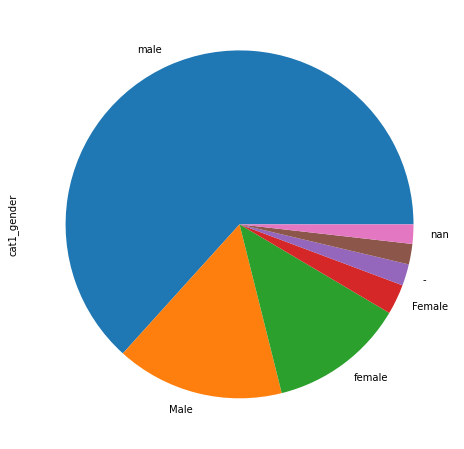

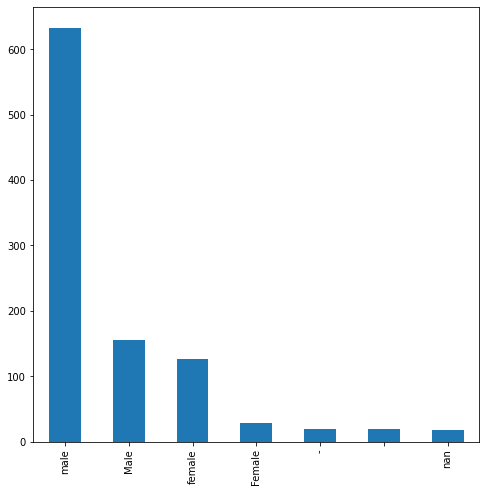

In [5]:
visualise_cat_variable(data.cat1_gender, 8)

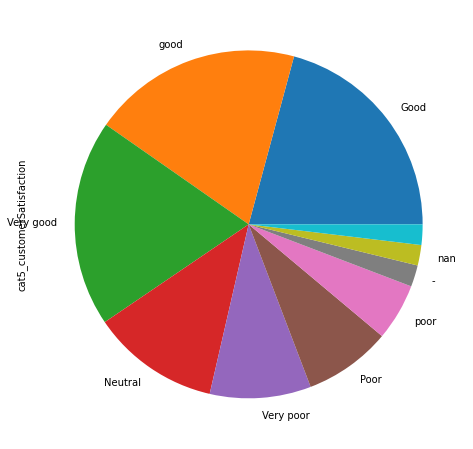

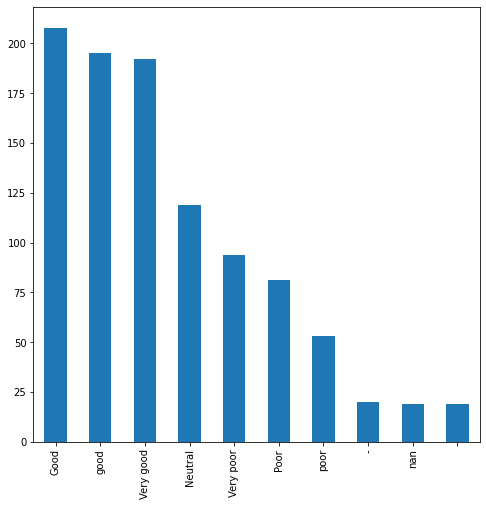

In [6]:
visualise_cat_variable(data.cat5_customerSatisfaction, 8)

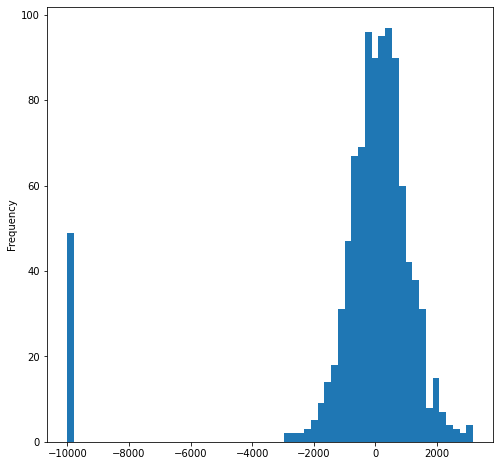

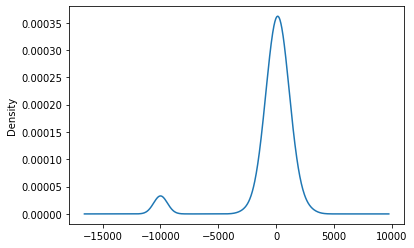

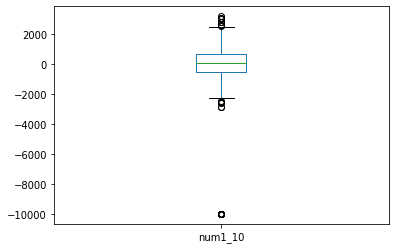

In [7]:
visualise_quant_variable(data.num1_10, 8)

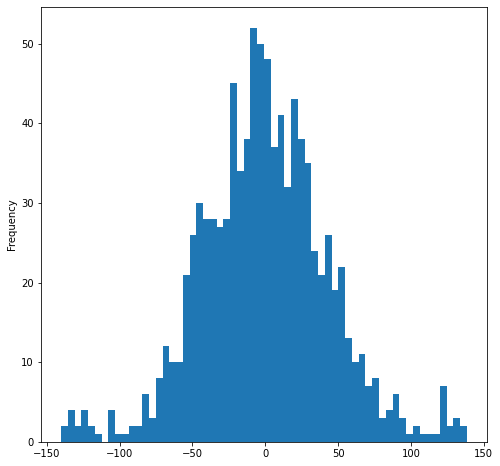

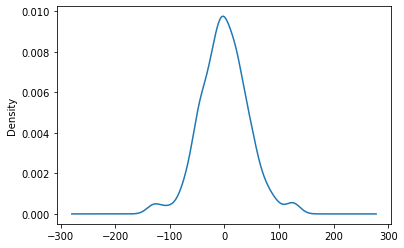

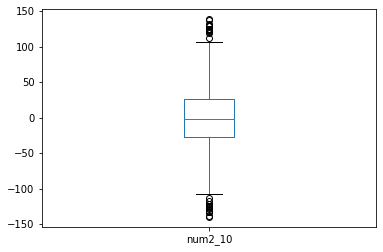

In [8]:
visualise_quant_variable(data.num2_10, 8)

Здесь необходимо заменить строки на NaN, в противном случае построение графика вызывает исключение

In [9]:
data.num3_10.replace([' ', '-'], np.nan, inplace=True)

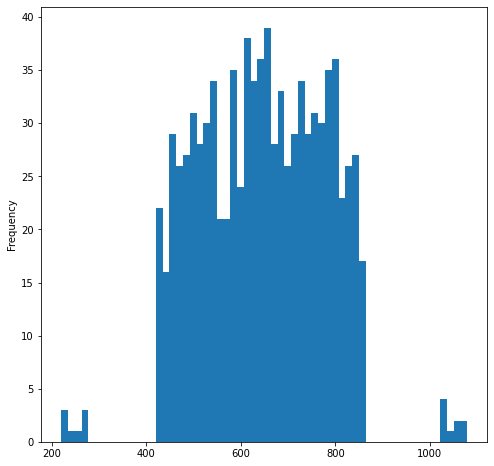

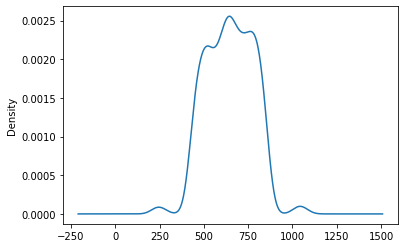

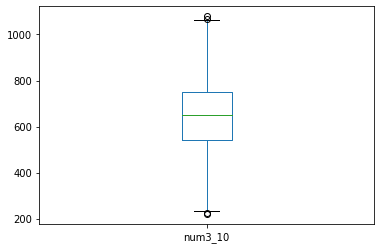

In [10]:
visualise_quant_variable(data.num3_10, 8)

## Подготовка данных

In [11]:
def prepare_cat_variable(data_frame, data_series_name):
    data_frame[data_series_name].replace([' ', '-', 'nan'], np.nan, inplace=True)
    data[data_series_name] = data[data_series_name].str.lower()
    return data_frame

In [12]:
def grubbs (data_frame, data_series_name, alpha):

    def grubbs_find (data_series, alpha):
        n = data_series.count()
        q = 1 - alpha / (2 * n)
        student_value = student_dist.ppf(q, n - 2)**2
        mean = data_series.mean()

        grubbs_critical = (n - 1) / sqrt(n) * sqrt(student_value  / (n - 2 + student_value))
        grubbs_doubt = max(data_series.min(), data_series.max(), key=lambda x: abs(mean - x))
        grubbs_value = abs(mean - grubbs_doubt) / data_series.std()

        return grubbss_doubt if grubbs_value > grubbs_critical else None

    while not grubbs_find(data_frame[data_series_name], alpha) is None:
        data_frame[data_series_name].replace(grubbs_find(data_frame[data_series_name, alpha]), np.NaN, inplace=True)

In [13]:
def delete_outliers_iqr(data_frame, data_series_name):
    q1 = data_frame[data_series_name].quantile(q=0.25)
    q3 = data_frame[data_series_name].quantile(q=0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    return data_frame.loc[((data_frame[data_series_name] >= lower_fence) & (data_frame[data_series_name] <= upper_fence)) | (data_frame[data_series_name].isna())]

In [14]:
def prepare_quant_variable(data_frame, data_series_name):
    data_frame[data_series_name].replace([' ', '-', 'nan', -9999, '-9999'], np.nan, inplace=True)
    _, lower_fence, upper_fence = sigmaclip(data_frame[data_series_name].dropna(), low=3, high=3)
    return data_frame.loc[ ((data_frame[data_series_name] >= lower_fence) & (data_frame[data_series_name] <= upper_fence)) | (data_frame[data_series_name].isna()) ]

In [15]:
data = prepare_cat_variable(data, 'cat5_customerSatisfaction')
data = prepare_cat_variable(data, 'cat1_gender')


In [16]:
def prepare_quant_variable_grubbs(data_frame, data_series_name):
    data_frame[data_series_name].replace([' ', '-', 'nan', -9999, '-9999'], np.nan, inplace=True)
    grubbs(data_frame, data_series_name, 0.05)
    return data_drame

In [17]:
data = prepare_quant_variable(data, 'num2_10')

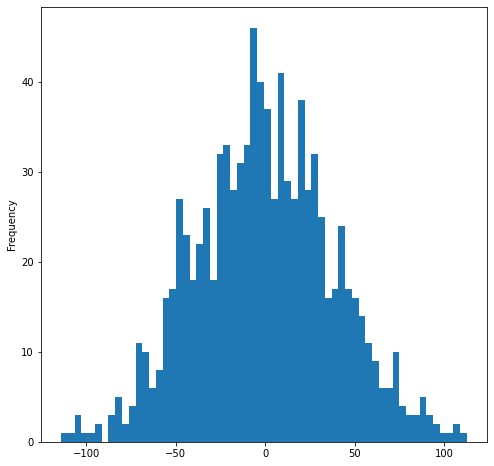

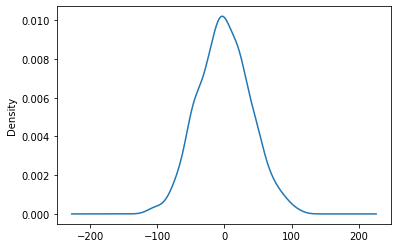

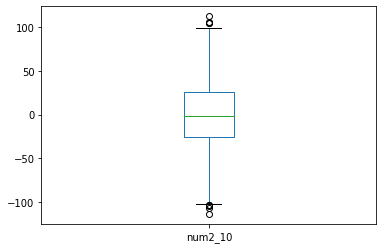

In [18]:
visualise_quant_variable(data.num2_10, 8)

In [19]:
data = prepare_quant_variable(data, 'num1_10')
data = prepare_quant_variable(data, 'num3_10')

C:\Users\Albert Nepomnyashiy\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
print("nan-values in cat5_customerStatisfaction: ", data.cat5_customerSatisfaction.isna().sum())
print("nan-values in cat1_gender: ", data.cat1_gender.isna().sum())
print("nan-values in num1_10: ", data.num1_10.isna().sum())
print("nan-values in num2_10: ", data.num2_10.isna().sum())
print("nan-values in num3_10: ", data.num3_10.isna().sum())

nan-values in cat5_customerStatisfaction:  56
nan-values in cat1_gender:  54
nan-values in num1_10:  47
nan-values in num2_10:  46
nan-values in num3_10:  88


In [21]:
data = data.reset_index(drop = True)


In [22]:
data

,cat5_customerSatisfaction,cat1_gender,num1_10,num2_10,num3_10
0,good,male,1952.951114,-14.984191,NaN
1,good,male,248.952820,15.251861,624.088559
2,good,male,465.578792,72.069553,NaN
3,very good,NaN,746.798307,-61.282697,702.582061
4,very good,male,-92.649660,11.401243,738.487789
...,...,...,...,...,...
938,very poor,male,0.376743,-67.418060,NaN
939,neutral,male,-1239.039630,49.175988,729.443313
940,poor,male,898.772621,3.237211,612.757921
941,good,NaN,-484.127869,23.486792,486.160999


## Восстановление пропущенных значений одного из признаков методом замены модой

In [23]:
gender_mode = data.cat1_gender.mode()[0]
data.cat1_gender.fillna(gender_mode, inplace=True)




## Восстановление пропущенных значений одного из признаков методом замены медианой

In [24]:
num2_10_median = data.num2_10.median()
data.num2_10.fillna(num2_10_median, inplace=True)



## Нормализация данных

In [25]:
data[['num1_10', 'num2_10', 'num3_10']] = MinMaxScaler().fit_transform(data[['num1_10', 'num2_10', 'num3_10']])

In [26]:
data['cat1_gender'] =LabelEncoder().fit_transform(data['cat1_gender'])

In [27]:
enc = OneHotEncoder()
enc.fit_transform(data[['cat5_customerSatisfaction']])
dum = pd.get_dummies(data.cat5_customerSatisfaction, dummy_na=True)
data = data.join(dum)

In [28]:
data

,cat5_customerSatisfaction,cat1_gender,num1_10,num2_10,num3_10,good,neutral,poor,very good,very poor,NaN
0,good,1,0.868883,0.437020,NaN,1,0,0,0,0,0
1,good,1,0.520580,0.570483,0.458574,1,0,0,0,0,0
2,good,1,0.564859,0.821277,NaN,1,0,0,0,0,0
3,very good,1,0.622341,0.232658,0.641257,0,0,0,1,0,0
4,very good,1,0.450755,0.553486,0.724823,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
938,very poor,1,0.469770,0.205576,NaN,0,0,0,0,1,0
939,neutral,1,0.216429,0.720224,0.703773,0,1,0,0,0,0
940,poor,1,0.653405,0.517450,0.432203,0,0,1,0,0,0
941,good,1,0.370735,0.606832,0.137566,1,0,0,0,0,0


## Восстановление пропущенных значений двух из признаков методом k-ближайших соседей

In [29]:
dum

,good,neutral,poor,very good,very poor,NaN
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
938,0,0,0,0,1,0
939,0,1,0,0,0,0
940,0,0,1,0,0,0
941,1,0,0,0,0,0


In [30]:
data

,cat5_customerSatisfaction,cat1_gender,num1_10,num2_10,num3_10,good,neutral,poor,very good,very poor,NaN
0,good,1,0.868883,0.437020,NaN,1,0,0,0,0,0
1,good,1,0.520580,0.570483,0.458574,1,0,0,0,0,0
2,good,1,0.564859,0.821277,NaN,1,0,0,0,0,0
3,very good,1,0.622341,0.232658,0.641257,0,0,0,1,0,0
4,very good,1,0.450755,0.553486,0.724823,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
938,very poor,1,0.469770,0.205576,NaN,0,0,0,0,1,0
939,neutral,1,0.216429,0.720224,0.703773,0,1,0,0,0,0
940,poor,1,0.653405,0.517450,0.432203,0,0,1,0,0,0
941,good,1,0.370735,0.606832,0.137566,1,0,0,0,0,0


In [31]:
for satisfaction in dum:
    data.loc[data.cat5_customerSatisfaction.isna(), satisfaction] = np.nan

data

,cat5_customerSatisfaction,cat1_gender,num1_10,num2_10,num3_10,good,neutral,poor,very good,very poor,NaN
0,good,1,0.868883,0.437020,NaN,1.0,0.0,0.0,0.0,0.0,0.0
1,good,1,0.520580,0.570483,0.458574,1.0,0.0,0.0,0.0,0.0,0.0
2,good,1,0.564859,0.821277,NaN,1.0,0.0,0.0,0.0,0.0,0.0
3,very good,1,0.622341,0.232658,0.641257,0.0,0.0,0.0,1.0,0.0,0.0
4,very good,1,0.450755,0.553486,0.724823,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
938,very poor,1,0.469770,0.205576,NaN,0.0,0.0,0.0,0.0,1.0,0.0
939,neutral,1,0.216429,0.720224,0.703773,0.0,1.0,0.0,0.0,0.0,0.0
940,poor,1,0.653405,0.517450,0.432203,0.0,0.0,1.0,0.0,0.0,0.0
941,good,1,0.370735,0.606832,0.137566,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
imputer = KNNImputer(n_neighbors=20)

data[['good', 'neutral', 'poor', 'very good', 'very poor', 'num1_10', 'num2_10', np.nan]] = pd.DataFrame(imputer.fit_transform(data[['good', 'neutral', 'poor', 'very good', 'very poor', 'num1_10', 'num2_10', np.nan]]))
data



,cat5_customerSatisfaction,cat1_gender,num1_10,num2_10,num3_10,good,neutral,poor,very good,very poor,NaN
0,good,1,0.868883,0.437020,NaN,1.0,0.0,0.0,0.0,0.0,0.0
1,good,1,0.520580,0.570483,0.458574,1.0,0.0,0.0,0.0,0.0,0.0
2,good,1,0.564859,0.821277,NaN,1.0,0.0,0.0,0.0,0.0,0.0
3,very good,1,0.622341,0.232658,0.641257,0.0,0.0,0.0,1.0,0.0,0.0
4,very good,1,0.450755,0.553486,0.724823,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
938,very poor,1,0.469770,0.205576,NaN,0.0,0.0,0.0,0.0,1.0,0.0
939,neutral,1,0.216429,0.720224,0.703773,0.0,1.0,0.0,0.0,0.0,0.0
940,poor,1,0.653405,0.517450,0.432203,0.0,0.0,1.0,0.0,0.0,0.0
941,good,1,0.370735,0.606832,0.137566,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:

data['cat5_customerSatisfaction'] = pd.DataFrame(enc.inverse_transform(data[list(dum)]))

In [34]:

imputer = KNNImputer(n_neighbors=20)
data[['num3_10', 'num2_10', 'num1_10']] = pd.DataFrame(imputer.fit_transform(data[['num3_10', 'num2_10', 'num1_10']]))
data

,cat5_customerSatisfaction,cat1_gender,num1_10,num2_10,num3_10,good,neutral,poor,very good,very poor,NaN
0,good,1,0.868883,0.437020,0.586562,1.0,0.0,0.0,0.0,0.0,0.0
1,good,1,0.520580,0.570483,0.458574,1.0,0.0,0.0,0.0,0.0,0.0
2,good,1,0.564859,0.821277,0.409173,1.0,0.0,0.0,0.0,0.0,0.0
3,very good,1,0.622341,0.232658,0.641257,0.0,0.0,0.0,1.0,0.0,0.0
4,very good,1,0.450755,0.553486,0.724823,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
938,very poor,1,0.469770,0.205576,0.523397,0.0,0.0,0.0,0.0,1.0,0.0
939,neutral,1,0.216429,0.720224,0.703773,0.0,1.0,0.0,0.0,0.0,0.0
940,poor,1,0.653405,0.517450,0.432203,0.0,0.0,1.0,0.0,0.0,0.0
941,good,1,0.370735,0.606832,0.137566,1.0,0.0,0.0,0.0,0.0,0.0


## Визуализация полученных данных

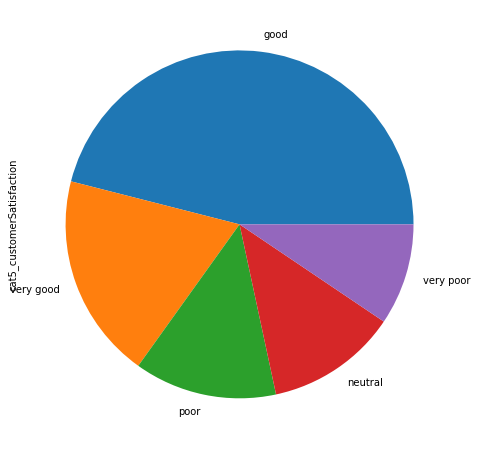

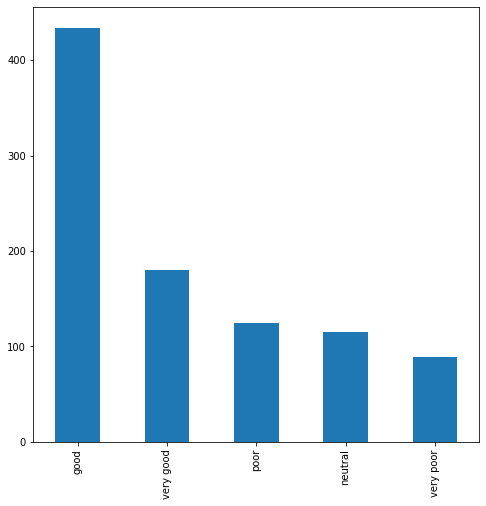

In [35]:
visualise_cat_variable(data.cat5_customerSatisfaction, 8)

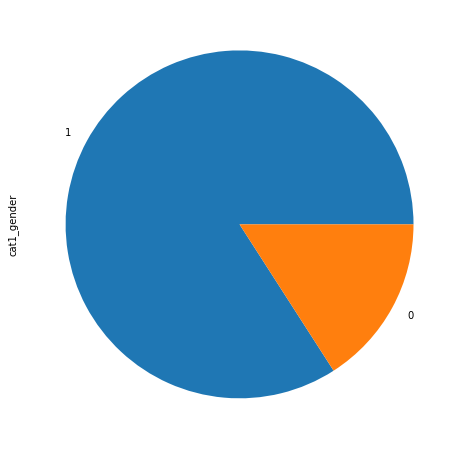

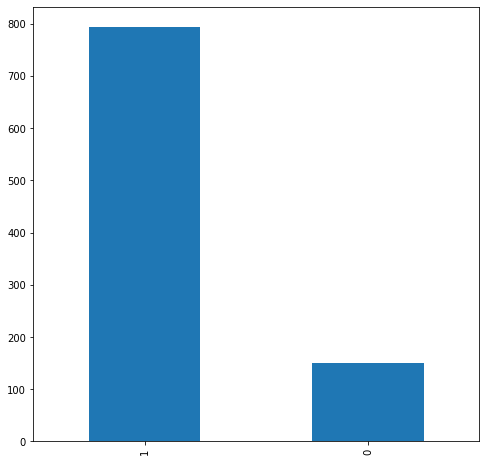

In [36]:
visualise_cat_variable(data.cat1_gender, 8)

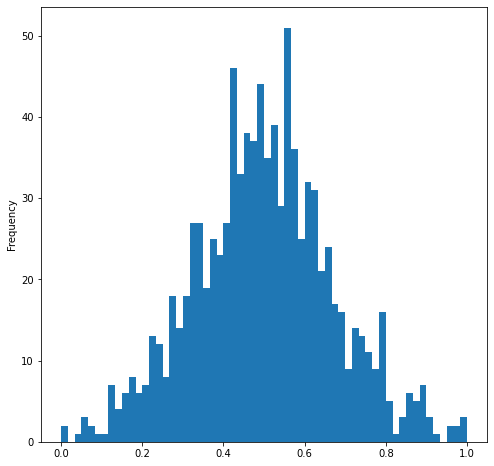

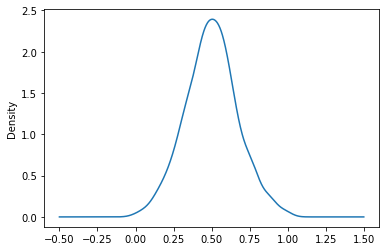

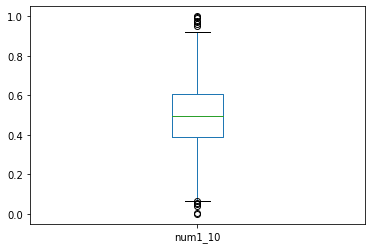

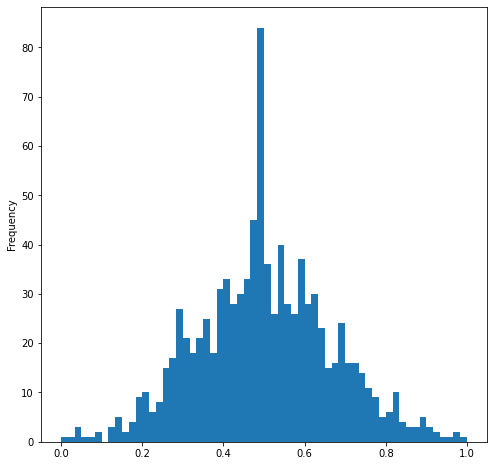

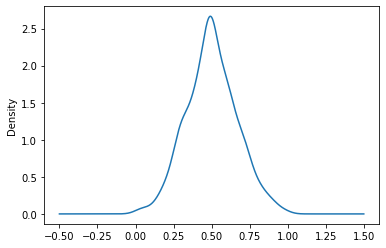

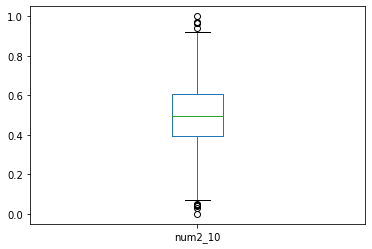

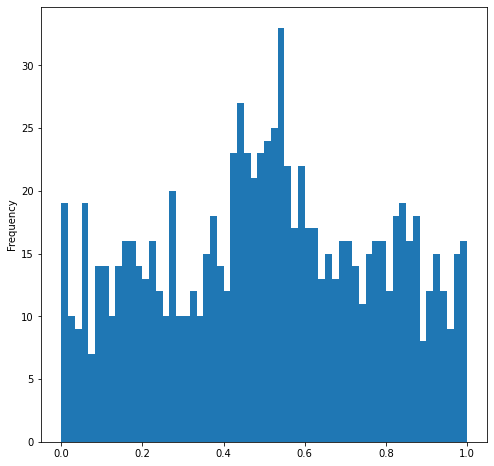

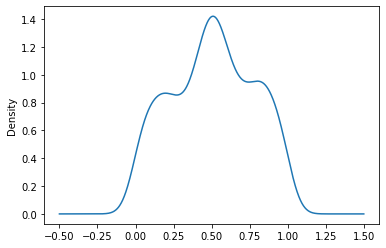

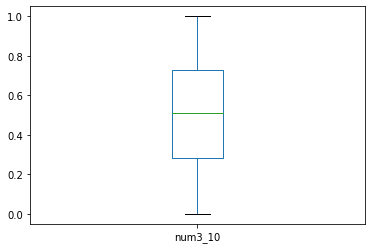

In [37]:
visualise_quant_variable(data.num1_10, 8)
visualise_quant_variable(data.num2_10, 8)
visualise_quant_variable(data.num3_10, 8)